"""
### Comparative Performance Study of Clustering Algorithms

This notebook explores the performance of different clustering algorithms on the UCI Iris dataset. The study applies different preprocessing techniques, evaluates multiple clustering methods, and compares results using various performance metrics.

#### **Steps Involved:**
1. **Load the Dataset**: We use the Iris dataset from Scikit-learn.
2. **Preprocessing Techniques**: StandardScaler and MinMaxScaler are applied to normalize data.
3. **Clustering Algorithms**:
   - K-Means
   - DBSCAN
   - Agglomerative Clustering
4. **Performance Evaluation Metrics**:
   - Silhouette Score
   - Davies-Bouldin Index
   - Calinski-Harabasz Score
5. **Results Visualization**:
   - Bar charts for comparison of clustering performance.
   - PCA visualization of clustered data.

#### **Results Interpretation:**
- The impact of different scalers on clustering performance is examined.
- The clustering algorithms are evaluated based on the selected metrics.
- Visualizations provide an intuitive understanding of cluster distribution.

Finally, the results are saved to a CSV file for further analysis.


    Preprocessing                Algorithm  Silhouette Score  \
0  StandardScaler                   KMeans          0.479881   
1  StandardScaler                   DBSCAN          0.356516   
2  StandardScaler  AgglomerativeClustering          0.446689   
3    MinMaxScaler                   KMeans          0.482929   
4    MinMaxScaler                   DBSCAN               NaN   
5    MinMaxScaler  AgglomerativeClustering          0.504800   

   Davies-Bouldin Index  Calinski-Harabasz Score  
0              0.789363               157.360153  
1              7.124057                84.510330  
2              0.803467               222.719164  
3              0.786733               351.295064  
4                   NaN                      NaN  
5              0.747977               349.254185  


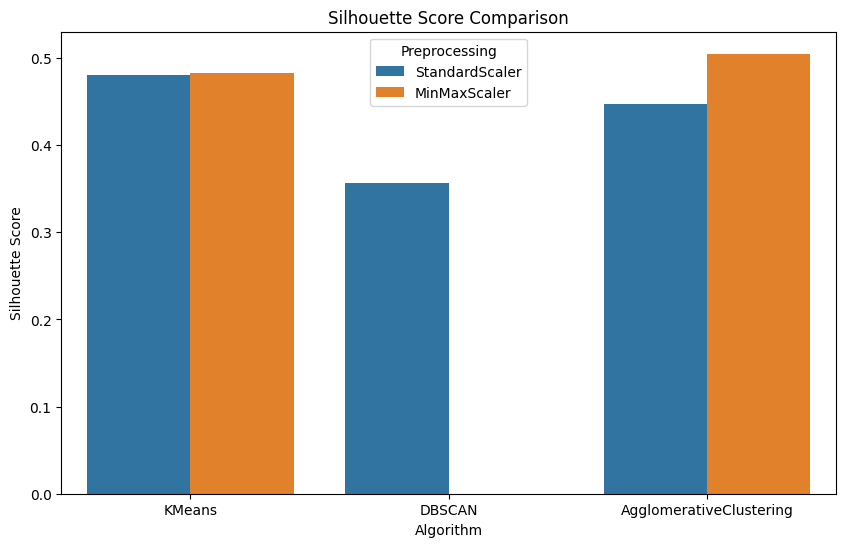

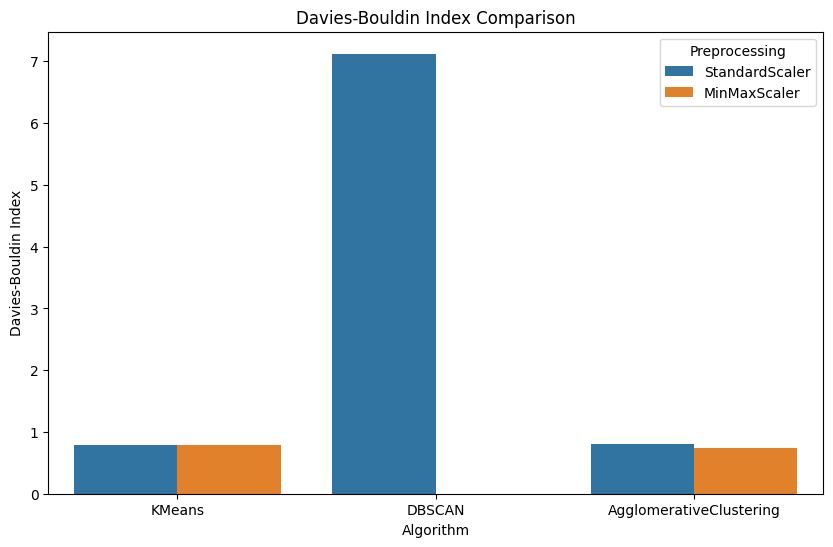

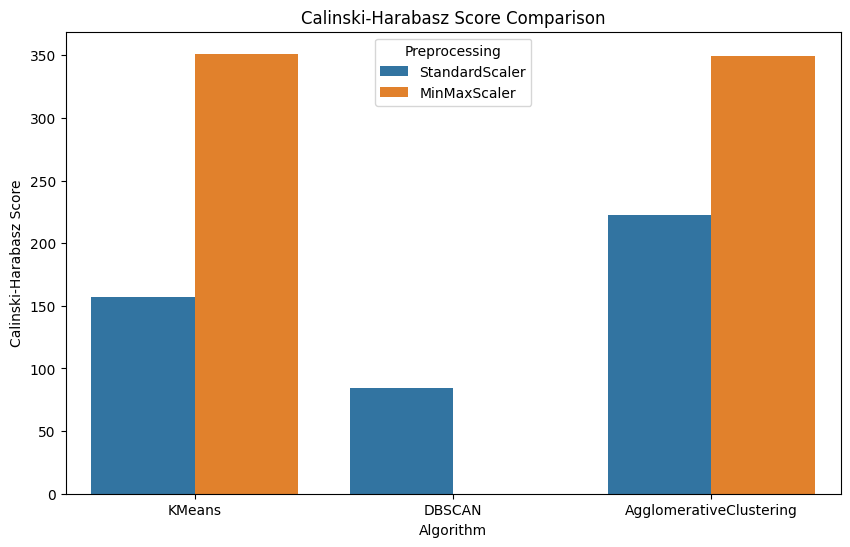

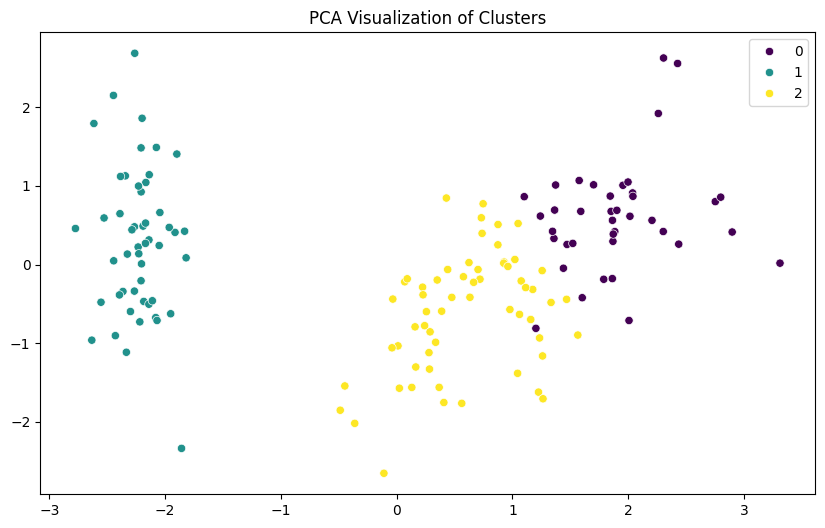

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Preprocessing techniques
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler()
}

# Clustering algorithms
clustering_algorithms = {
    "KMeans": KMeans(n_clusters=3, random_state=42),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=5),
    "AgglomerativeClustering": AgglomerativeClustering(n_clusters=3)
}

results = []

for scaler_name, scaler in scalers.items():
    scaled_data = scaler.fit_transform(df)

    for algo_name, algo in clustering_algorithms.items():
        cluster_labels = algo.fit_predict(scaled_data)

        if len(set(cluster_labels)) > 1:  # Ensuring meaningful clusters
            silhouette = silhouette_score(scaled_data, cluster_labels)
            davies_bouldin = davies_bouldin_score(scaled_data, cluster_labels)
            calinski_harabasz = calinski_harabasz_score(scaled_data, cluster_labels)
        else:
            silhouette, davies_bouldin, calinski_harabasz = np.nan, np.nan, np.nan

        results.append([scaler_name, algo_name, silhouette, davies_bouldin, calinski_harabasz])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Preprocessing", "Algorithm", "Silhouette Score", "Davies-Bouldin Index", "Calinski-Harabasz Score"])
print(results_df)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Algorithm', y='Silhouette Score', hue='Preprocessing', data=results_df)
plt.title('Silhouette Score Comparison')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Algorithm', y='Davies-Bouldin Index', hue='Preprocessing', data=results_df)
plt.title('Davies-Bouldin Index Comparison')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Algorithm', y='Calinski-Harabasz Score', hue='Preprocessing', data=results_df)
plt.title('Calinski-Harabasz Score Comparison')
plt.show()

# PCA Visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(StandardScaler().fit_transform(df))

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=KMeans(n_clusters=3, random_state=42).fit_predict(df), palette='viridis')
plt.title("PCA Visualization of Clusters")
plt.show()

# Save results to CSV
results_df.to_csv("clustering_comparison_results.csv", index=False)
